In [0]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import files
from io import BytesIO
from PIL import Image

uploaded = files.upload()

Saving jen.jpg to jen.jpg


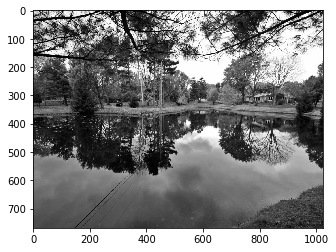

In [0]:
img_path='jef1.jpg'
bgr_img = cv2.imread(img_path)
gray_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)
gray_img = gray_img.astype("float32")/255
plt.imshow(gray_img, cmap = 'gray')
plt.show()

In [0]:
import numpy as np
filter_vals = np.array([[-1,-1,1,1],[-1,-1,1,1],[-1,-1,1,1],[-1,-1,1,1]])
print('Filter shape:', filter_vals.shape)

Filter shape: (4, 4)


In [0]:
f1=filter_vals
f2 = -f1
f3 = f1.T
f4 = -f3
filter = np.array([f1,f2,f3,f4])
#just an example
print('Filter 1',f1)
print('Filter 2',f2)
print('Filter 3',f3)
print('Filter 4',f4)

Filter 1 [[-1 -1  1  1]
 [-1 -1  1  1]
 [-1 -1  1  1]
 [-1 -1  1  1]]
Filter 2 [[ 1  1 -1 -1]
 [ 1  1 -1 -1]
 [ 1  1 -1 -1]
 [ 1  1 -1 -1]]
Filter 3 [[-1 -1 -1 -1]
 [-1 -1 -1 -1]
 [ 1  1  1  1]
 [ 1  1  1  1]]
Filter 4 [[ 1  1  1  1]
 [ 1  1  1  1]
 [-1 -1 -1 -1]
 [-1 -1 -1 -1]]


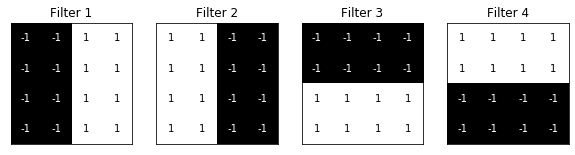

In [13]:
fig = plt.figure(figsize=(10,5))
for i in range(4):
  ax = fig.add_subplot(1,4,i+1,xticks=[],yticks=[])
  ax.imshow(filter[i], cmap='gray')
  ax.set_title('Filter %s' % str(i+1))
  width, height = filter[i].shape
  for x in range(width):
    for y in range(height):
      ax.annotate(str(filter[i][x][y]), xy=(y,x),
                  horizontalalignment= 'center',
                  verticalalignment= 'center',
                  color='white' if filter[i][x][y]<0 else 'black')

In [14]:
# To define a convolutional layer
import torch
import torch.nn as nn
import torch.nn.functional as F
class Net(nn.Module):
  def __init__(self, weight):
    super(Net, self).__init__()
    k_height, k_width = weight.shape[2:]
    self.conv = nn.Conv2d(1, 4, kernel_size=(k_height,k_width), bias=False)
    self.conv.weight = torch.nn.Parameter(weight)

  def forward(self,x):
    conv_x = self.conv(x)
    activated_x = F.relu(conv_x)
    return conv_x, activated_x
  
weight = torch.from_numpy(filter).unsqueeze(1).type(torch.FloatTensor)
model = Net(weight)
print(model)



Net(
  (conv): Conv2d(1, 4, kernel_size=(4, 4), stride=(1, 1), bias=False)
)


In [0]:
def viz_layer(layer, n_filters=4):
  fig = plt.figure(figsize=(20, 20))

  for i in range(n_filters):
      ax = fig.add_subplot(1, n_filters, i+1, xticks=[], yticks=[])
      ax.imshow(np.squeeze(layer[0,i].data.numpy()), cmap='gray')
      ax.set_title('Output %s' % str(i+1))



NameError: ignored

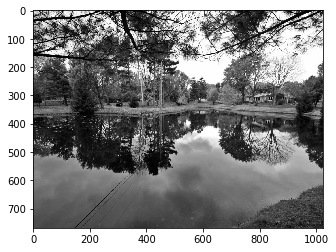

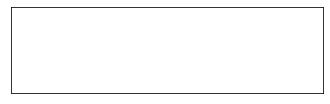

In [17]:
plt.imshow(gray_img, cmap='gray')

# visualize all filters
fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(left=0, right=1.5, bottom=0.8, top=1, hspace=0.05, wspace=0.05)
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap='gray')
    ax.set_title('Filter %s' % str(i+1))

    
# convert the image into an input Tensor
gray_img_tensor = torch.from_numpy(gray_img).unsqueeze(0).unsqueeze(1)

# get the convolutional layer (pre and post activation)
conv_layer, activated_layer = model(gray_img_tensor)

# visualize the output of a conv layer
viz_layer(conv_layer)

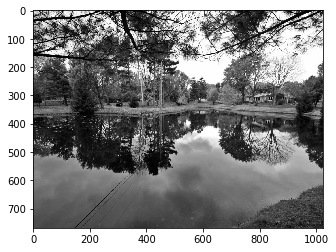

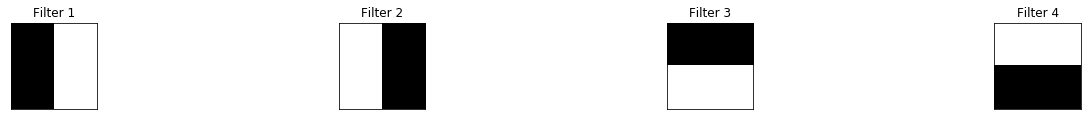

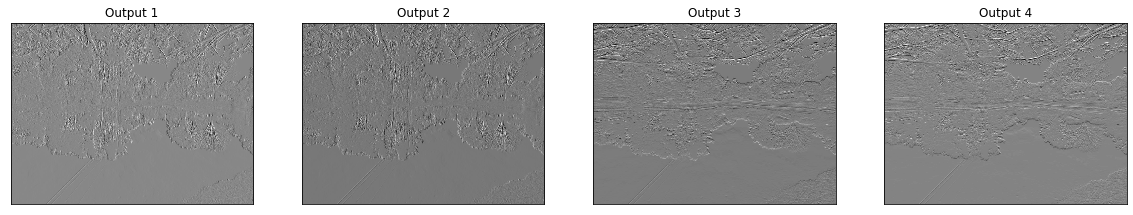

In [20]:
plt.imshow(gray_img, cmap='gray')

# visualize all filters
fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(left=0, right=1.5, bottom=0.8, top=1, hspace=0.05, wspace=0.05)
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(filter[i], cmap='gray')
    ax.set_title('Filter %s' % str(i+1))

    
# convert the image into an input Tensor
gray_img_tensor = torch.from_numpy(gray_img).unsqueeze(0).unsqueeze(1)

# get the convolutional layer (pre and post activation)
conv_layer, activated_layer = model(gray_img_tensor)

# visualize the output of a conv layer
viz_layer(conv_layer)

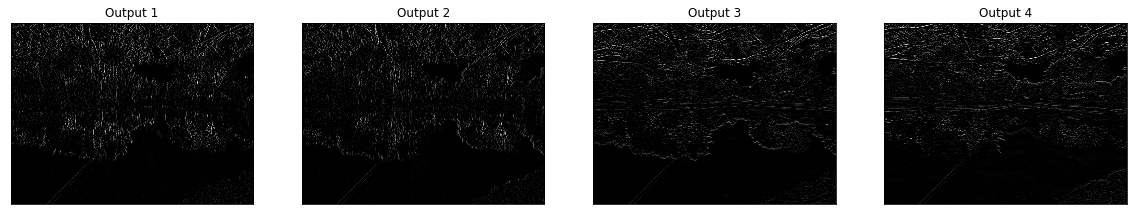

In [21]:
viz_layer(activated_layer)